# **Automatidata project**


You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.


### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

import pickle

In [2]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

In [3]:

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [4]:
# Inspect the first few rows of df0
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Inspect the first few rows of `nyc_preds_means`.

In [5]:
# Inspect the first few rows of `nyc_preds_means`
nyc_preds_means

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
...,...,...,...
22694,8.594643,1.098214,7.799138
22695,59.560417,18.757500,52.000000
22696,6.609091,0.684242,6.130896
22697,16.650000,2.077500,11.707049


#### Join the two dataframes


In [6]:
# Merge datasets
df_merged = df0.merge(nyc_preds_means, left_index=True, right_index=True)
df_merged

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,14.616667,4.435000,15.845642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,8.594643,1.098214,7.799138
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.560417,18.757500,52.000000
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,6.609091,0.684242,6.130896
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.650000,2.077500,11.707049


### **Feature engineering**



In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Customers who pay cash generally have a tip amount of $0. To meet the modeling objective, I need to sample the data to select only the customers who pay with credit card. 


In [8]:
# Subset the data to isolate only customers who paid by credit card
df1 = df_merged.copy()
mask = df1['payment_type'] == 1
df1 = df1[mask]

df1['payment_type'].unique()

array([1])

##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable.

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  


In [10]:
# Create tip % col
df1['tip_percent'] = np.round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245,0.200
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218,0.238
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706,0.199
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650,0.300
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.855376,2.052258,10.441351,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,18.016667,5.700000,19.426247,0.200
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,8.095370,1.062778,7.300146,0.200
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.560417,18.757500,52.000000,0.250
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.650000,2.077500,11.707049,0.150


Creating a column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [11]:
# Create 'generous' col (target)
df1['generous'] = df1['tip_percent'].apply(lambda x: 1 if x >= 0.200 else 0)

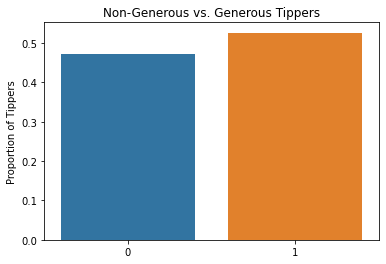

In [36]:
import seaborn as sns
bar = df1.groupby('generous')['tip_percent'].count().reset_index().rename(columns={'tip_percent':'count'})
bar['count'] = bar['count']/bar['count'].sum()
plot = sns.barplot(data=bar, x='generous', y='count')
plot.set_ylabel("Proportion of Tippers");
plot.set_xlabel("");

plot.set_title("Non-Generous vs. Generous Tippers");


Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [12]:
# Convert pickup and dropoff cols to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [13]:
# Create a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

#### Create time of day columns

Create four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  


In [14]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].apply(lambda x: 1 if 6 <= x.hour < 10 else 0)

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].apply(lambda x: 1 if 10 <= x.hour < 16 else 0)

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].apply(lambda x: 1 if 16 <= x.hour < 20 else 0)

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].apply(lambda x: 1 if 20 <= x.hour < 6 else 0)

#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

In [22]:
# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name().str.lower()

In [23]:
# Examining the first 5 rows of my new df
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,1,0,0,0,march
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,0,1,0,0,april
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,1,0,0,0,december
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday,0,0,0,0,march


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [24]:
# Drop columns
to_drop = ['payment_type','tip_amount','tip_percent','tolls_amount','improvement_surcharge', 'mta_tax','store_and_fwd_flag','Unnamed: 0','tpep_pickup_datetime','tpep_dropoff_datetime']
df1 = df1.drop(to_drop,axis=1)
df1.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,extra,total_amount,mean_duration,mean_distance,predicted_fare,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,2,6,3.34,1,100,231,13.0,0.0,16.56,22.847222,3.521667,16.434245,1,saturday,1,0,0,0,march
1,1,1,1.80,1,186,43,16.0,0.0,20.80,24.470370,3.108889,16.052218,1,tuesday,0,1,0,0,april
2,1,1,1.00,1,262,236,6.5,0.0,8.75,7.250000,0.881429,7.053706,0,friday,1,0,0,0,december
3,2,1,3.70,1,188,97,20.5,0.0,27.69,30.250000,3.700000,18.731650,1,sunday,0,1,0,0,may
5,2,6,2.30,1,161,236,9.0,0.5,12.36,11.855376,2.052258,10.441351,1,saturday,0,0,0,0,march


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [25]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID','PULocationID','DOLocationID']

# 2. Convert each column to string
for col in cols_to_str:
    df1[col] = df1[col].astype(str)


Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [26]:
# Convert categoricals to binary
df2 = pd.get_dummies(df1)

##### Evaluation metric

Before modeling, I need to decide on an evaluation metric. 

1. Examine the class balance of the target variable

In [27]:
# Get class balance of 'generous' col
df2['generous'].value_counts() / len(df2) * 100

1    52.636751
0    47.363249
Name: generous, dtype: float64

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.



I will use F1 score as it is the harmonic mean between precision and recall. This will balance false positives and false negatives.

### **Task 3. Modeling**

##### **Split the data**

Split the data into features/target variable and training/testing data. 


In [28]:
# Isolate target variable (y)
y = df2['generous']

# Isolate the features (X)
X = df2.drop(['generous'],axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>
 


In [29]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state = 42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth': [3,4,5],
             'max_features': ["sqrt","log"],
             'max_samples': [0.5,0.9],
             'min_samples_leaf': [0.5,1],
             'min_samples_split': [0.001, 0.01],
             'n_estimators': [50, 100]}

# 3. Define a set of scoring metrics to capture
scoring = ['precision','accuracy','recall','f1']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1', n_jobs = -1)

In [30]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 2.78 s, sys: 815 ms, total: 3.6 s
Wall time: 1min 11s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [34]:
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

Using `pickle` to save models and read them back in.

In [35]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [42]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [43]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [44]:
write_pickle(path, rf_cv, 'rf_cv_classifier')


In [45]:
rf_cv = read_pickle(path, 'rf_cv_classifier')

Examine the best average score across all the validation folds. 

In [48]:
# Examine best score
rf_cv.best_score_

0.7614969071941513

Examine the best combination of hyperparameters.

In [49]:
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [50]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [52]:
table = make_results('Random Forest Classifier', rf_cv, 'f1')
table

,model,precision,recall,F1,accuracy
0,Random Forest Classifier,0.699235,0.836038,0.761497,0.722488


Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

In [53]:
# Get scores on test data
rf_preds = rf_cv.predict(X_test)

The `get_test_scores()` function below will output the scores of the model on the test data.

In [54]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

#### RF test results

In [55]:
 # Get scores on test data
rf_test_scores = get_test_scores("Random Forest Classifier", rf_preds, y_test)
rf_test_scores

,model,precision,recall,F1,accuracy
0,Random Forest Classifier,0.680907,0.825448,0.746243,0.712414


**Question:** How do your test results compare to your validation results?

Precision and recall are slightly lower than in the validation set, and F1 reflects this change appropriately. Accuracy decreases by about 1%. 

##### **XGBoost**

 Now I am trying to improve scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [57]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state = 42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth': [3,4,5],
             'learning_rate': [0.1,0.2,0.3],
             'min_child_weight': [3,5],
             'n_estimators': [5, 10, 15]}

# 3. Define a set of scoring metrics to capture
scoring = ['precision','accuracy','recall','f1']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1', n_jobs = -1)

Now fit the model to the `X_train` and `y_train` data.

In [58]:
%%time
xgb_cv.fit(X_train, y_train)


CPU times: user 52.5 s, sys: 497 ms, total: 53 s
Wall time: 4min 13s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecate

Get the best score from this model.

In [60]:
# Examine best score
xgb_cv.best_score_

0.8556007735787041

And the best parameters.

In [61]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 15}

##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [65]:
# Call 'make_results()' on the GridSearch object
xgb_table = make_results("XG Boost Validation", xgb_cv, 'f1')
xgb_table

,model,precision,recall,F1,accuracy
0,XG Boost Validation,0.824962,0.888735,0.855601,0.841058


In [62]:
# Get scores on test data
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [66]:
# Get scores on test data
xgb_test_scores = get_test_scores("XG Boost Test", xgb_preds, y_test)
xgb_test_scores

,model,precision,recall,F1,accuracy
0,XG Boost Test,0.823313,0.858056,0.840326,0.832951


Compared to the random forest test scores (f1 being 0.746), our XG Boost classifier performs significantly better. It outperforms our random forest in all evaluation metrics.

Plot a confusion matrix of the model's predictions on the test data.

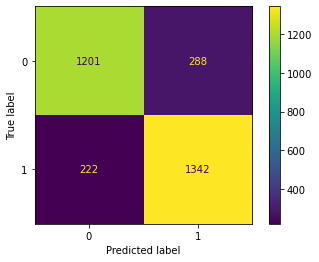

In [68]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_preds, labels = xgb_cv.best_estimator_.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = xgb_cv.best_estimator_.classes_)
disp.plot(values_format='')
plt.show()

False Positives are more common, meaning our model is more likely to make a Type I error.

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

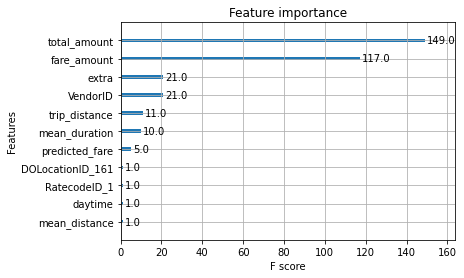

In [70]:
plot_importance(xgb_cv.best_estimator_)

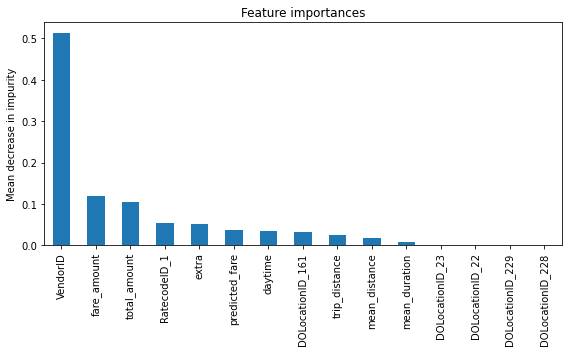

In [71]:
importances = xgb_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

### ** Conclusion**

- I would recommend this model as it is pretty effective in determining whether or not someone will be a generous tipper. It makes limited type I and type II errors. 
- The model has an F1 score of 0.840 on the test dataset and an Accuracy of 0.832


- This model is based on gradient boosting, a method where each base learner in the training sequence is built to predict the residual errors of the model preceding it. 
- We know that VendorID, fare_amount, total_amount, and ratecode_1 are important features, but we do not know how they influence tips. It appears that one vendor brings in more generous customers, more research needs to be done on this.
- I cannot explain how it is making predictions as this is a black-box model. 

- Given that we only have data for users with credit card tips available to us, it would be great to have data on cash tips to see how that impacts model performance.
